# Space Server - Classification

The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested.

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.

## About the data

- objid = Object Identifier


- ra = J2000 Right Ascension (r-band)


- dec = J2000 Declination (r-band)


- u = better of DeV/Exp magnitude fit


- g = better of DeV/Exp magnitude fit


- r = better of DeV/Exp magnitude fit


- i = better of DeV/Exp magnitude fit


- z = better of DeV/Exp magnitude fit

u, g, r, i, z represent the response of the 5 bands of the telescope.


- run = Run Number


- rereun = Rerun Number


- camcol = Camera column


- field = Field number 


- specobjid = Object Identifier


- class = object class (galaxy, star or quasar object)


- specobjid = Object Identifier


- redshift = Final Redshift


- plate = plate number


- mjd = MJD of observation


- fiberid = fiber ID

In [1]:
# Importing the data

import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


- There are no categorical features at all - besides the class column, thus it will be needed to encode this column to be a numerical column.

In [2]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

objid and specobjid are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.

The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

In [3]:
# Deleting duplicate rows
df[df.duplicated(keep='first')].shape

(0, 18)

There are no duplicate entries

In [4]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


The dataset has 10000 examples, 17 feature columns and 1 target column. 7 of the 17 features are 64 bit integers, 10 are 64 bit floats and the target column is of the type object.

In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


From the above table we can tell that are no missing values at all. 

We also notice that most of the features stay within a reasonable scale when comparing values within only one column. 

In [8]:
df.describe(include=['O'])

,class
count,10000
unique,3
top,GALAXY
freq,4998


The target variable 'class' has 3 unique type, out of which GALAXY is the most frequently occuring.

# EDA

In [9]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#### Univariate Analysis

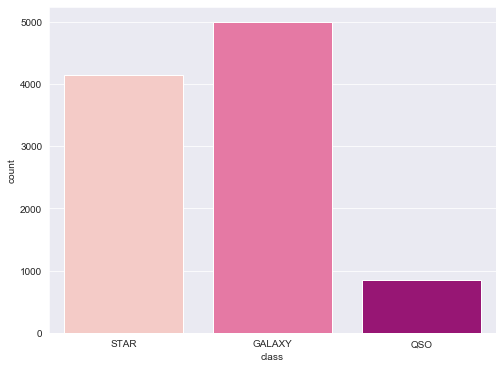

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'RdPu')

- As mentioned above, Galaxy is most frequently occuring class type in our data, followed by Star and QSO

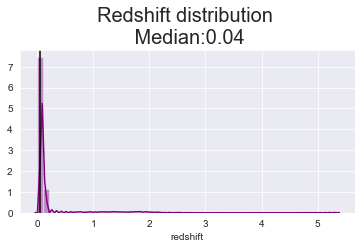

In [11]:
plt.subplots(figsize=(6,3))
sns.distplot(df['redshift'],color='purple')
plt.title('Redshift distribution \n Median:{0:.2f}'.format(df['redshift'].median()),size=20)
plt.axvline(df['redshift'].median(),color='black',label='Median')

The central value of redshift column is 0.04, i.e the average redshift value is 0.04

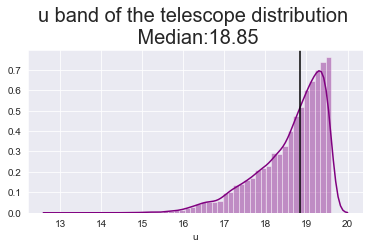

In [12]:
plt.subplots(figsize=(6,3))
sns.distplot(df['u'],color='purple')
plt.title('u band of the telescope distribution \n Median:{0:.2f}'.format(df['u'].median()),size=20)
plt.axvline(df['u'].median(),color='black',label='Median')

The central value of u band of the telescope column is 18.85, i.e the average value of u band of the telescope value is 18.85

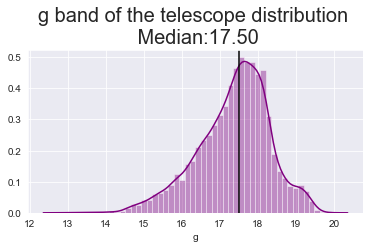

In [13]:
plt.subplots(figsize=(6,3))
sns.distplot(df['g'],color='purple')
plt.title('g band of the telescope distribution \n Median:{0:.2f}'.format(df['g'].median()),size=20)
plt.axvline(df['g'].median(),color='black',label='Median')

The central value of g band of the telescope column is 17.50, i.e the average value of u band of the telescope value is 17.50

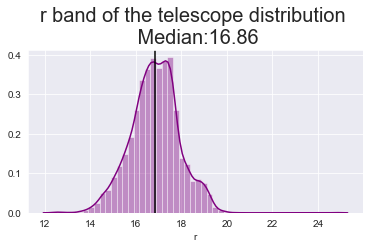

In [14]:
plt.subplots(figsize=(6,3))
sns.distplot(df['r'],color='purple')
plt.title('r band of the telescope distribution \n Median:{0:.2f}'.format(df['r'].median()),size=20)
plt.axvline(df['r'].median(),color='black',label='Median')

The central value of r band of the telescope column is 16.86, i.e the average value of u band of the telescope value is 16.86

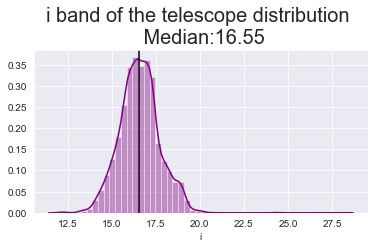

In [15]:
plt.subplots(figsize=(6,3))
sns.distplot(df['i'],color='purple')
plt.title('i band of the telescope distribution \n Median:{0:.2f}'.format(df['i'].median()),size=20)
plt.axvline(df['i'].median(),color='black',label='Median')

The central value of i band of the telescope column is 16.55, i.e the average value of u band of the telescope value is 16.55

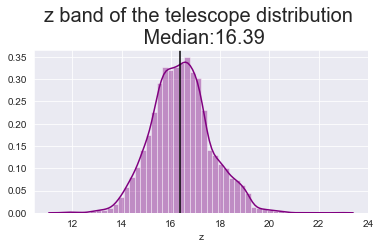

In [16]:
plt.subplots(figsize=(6,3))
sns.distplot(df['z'],color='purple')
plt.title('z band of the telescope distribution \n Median:{0:.2f}'.format(df['z'].median()),size=20)
plt.axvline(df['z'].median(),color='black',label='Median')

The central value of z band of the telescope column is 16.39, i.e the average value of u band of the telescope value is 16.39

#### Bivariate Analysis

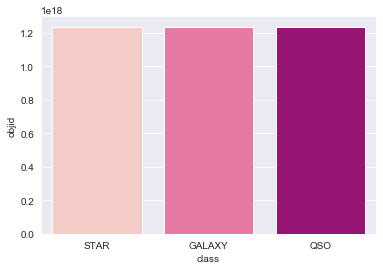

In [17]:
sns.barplot(x='class',y='objid',data=df,palette='RdPu')

The variable objid has no visible effect on the target variable class.

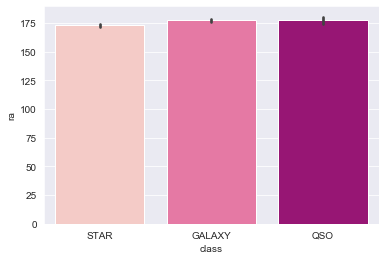

In [18]:
sns.barplot(x='class',y='ra',data=df,palette='RdPu')

The variable ra has no visible effect on the target variable class.

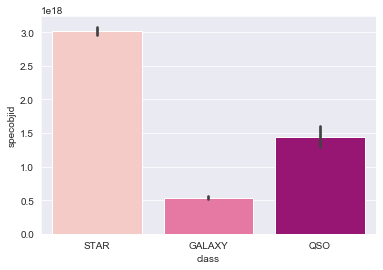

In [19]:
sns.barplot(x='class',y='specobjid',data=df,palette='RdPu')

- The variable specobjid has a strong visible effect on the target variable class.


- As the value of specobjid increases the, class of the target variable is more likely to be a Star, and the lower the value of specobjid, the class of the target variable is more likely to be a Galaxy. 

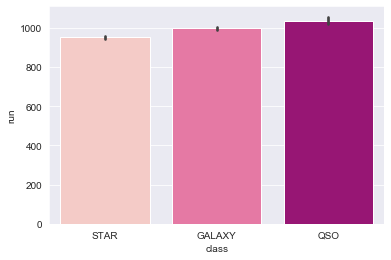

In [20]:
sns.barplot(x='class',y='run',data=df,palette='RdPu')

The variable run has no visible effect on the target variable class.

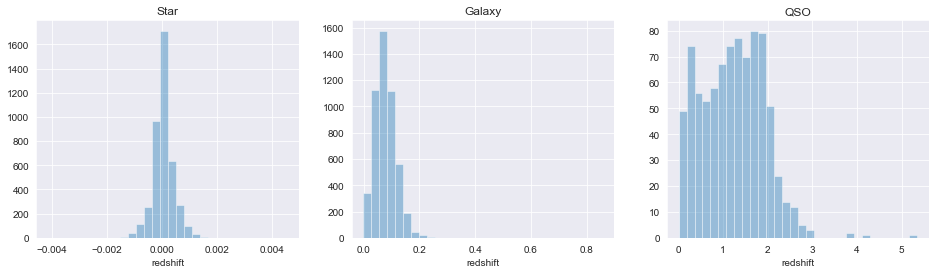

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

- Stars - we can see that the histogram resembles a normal distribution with the mean u = 0


- Galaxies - here the values appear to be from the normal distribution with a slightly heavier right tail. This distribution has an average value around the 0.075 point.


- Quasars - Redshift values are much more uniformly dispersed than in stars and galaxies. They are more or less evenly distributed in the range from 0 to 3, then their occurrence seems to disappear drastically. Close to 4 and 5, we have a pair of outliers.

__These plots show the distribution of redshifts for each class and give an insight about the distance to each class.__

__It can be concluded that stars are the closest, galaxies are further, and the furthest are the quasars.__

__redshift is an important feature when classifying each object since the distribution of redshifts is different for each class.__

In [22]:
leftover_features = ['ra','dec','u','g','r','i','z','redshift']
axe_indexes = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]
zipped = list(zip(axe_indexes, leftover_features))

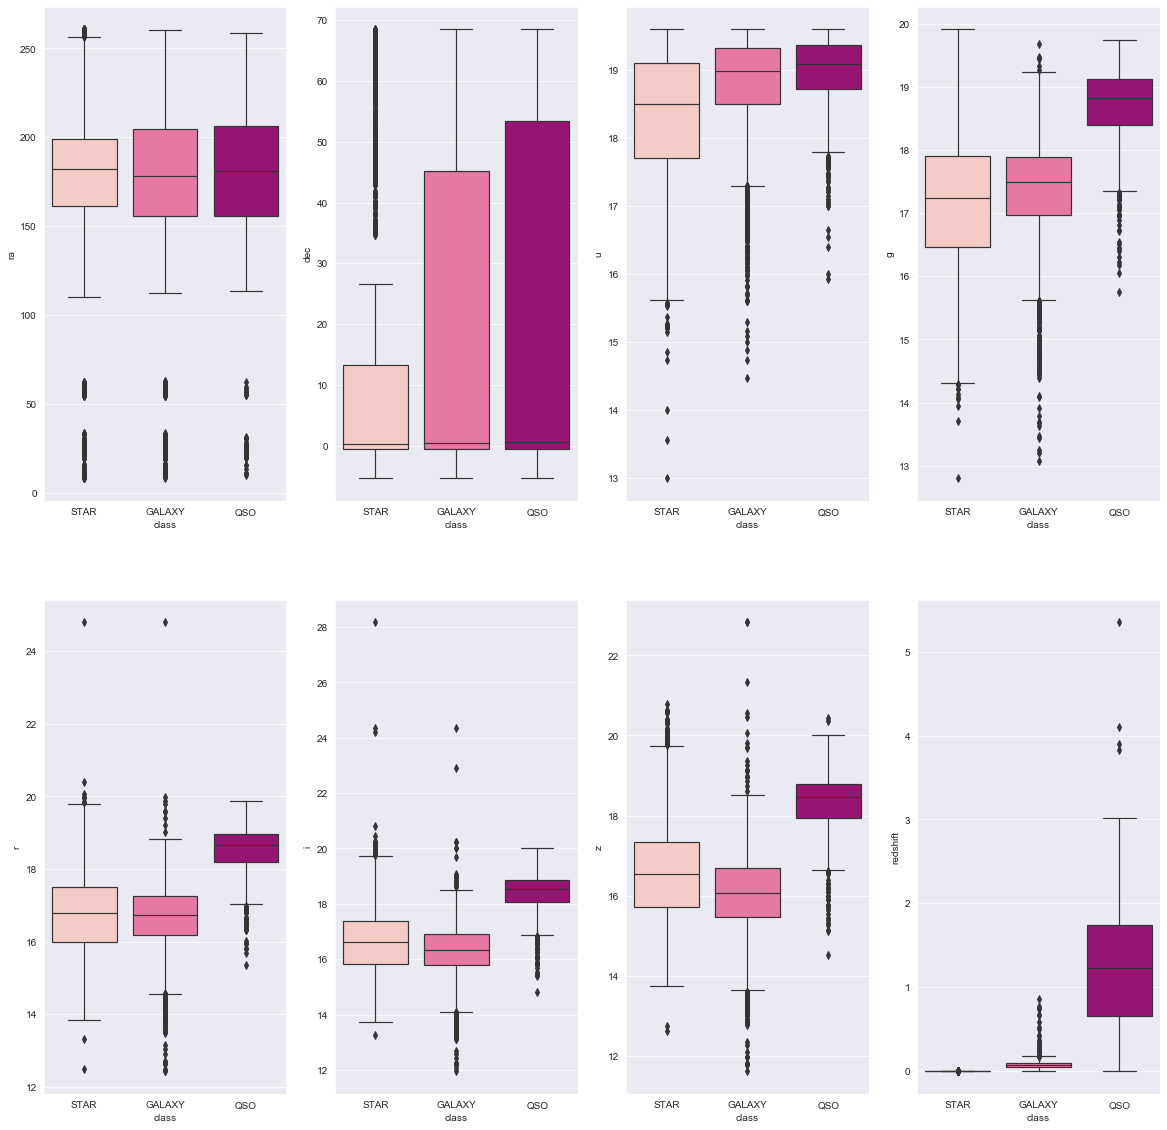

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,20))
for indexes, feature in zipped:
    sns.set_context("paper", rc={"font.size":15,
                                 "axes.titlesize":15,
                                 "axes.labelsize":20,
                                 "xtick.labelsize":20,
                                 "ytick.labelsize":17,
                                 "legend.fontsize":17})      
    sns.boxplot(x="class", y=feature, data=df, ax=axes[indexes[0], indexes[1]],palette='RdPu')

- Retiscence: Data is distributed in a very similar way for all 3 classes. We can observe an accumulation of outliers ranging in value [0-50]. There are more of them in stars and galaxies than in quasars, but this is due to the fact that quasars are simply rarer than other objects.




- Declination: The graphs are similar for Galaxies and Quasars, but the graph for stars is completely different. We have a lot of outliers here. Virtually everything with a value greater than 2.0 is an outlier here.




- Bands u, g, r, i, z: There are clear differences between the classes - especially between quasars and other classes. In terms of these traits, it seems that quasars have greater band values ​​than the rest of the classes. We can also observe a lot of outliers - especially in the lower ranges of values.




- Redshift: Quasars clearly stand out from galaxies and stars here. Practically all stars here have values ​​of this feature oscillating around zero. This is probably due to the fact that most of the stars observed in the night sky belong to the Milky Way. The dispersion of the value of this feature for individual classes may suggest that it will have a significant impact in the classification process.

# Feature Extraction

In [24]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [25]:
df.shape

(10000, 18)

In [26]:
# Dropping the columns that have just one data level

temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

df.shape

(10000, 16)

In [27]:
temp

['objid', 'rerun']

The columns 'objid' and 'rerun' have been dropped

In [28]:
df = df.drop(['ra','dec'], axis=1)

dropped the columns 'ra' and 'dec' because both have 10000 different values which will not help in the prediction

#### Checking for outliers

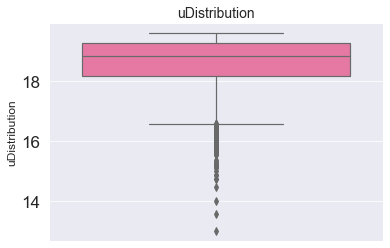

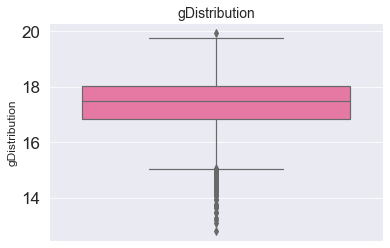

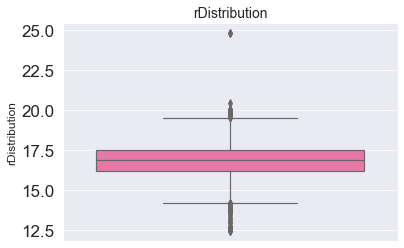

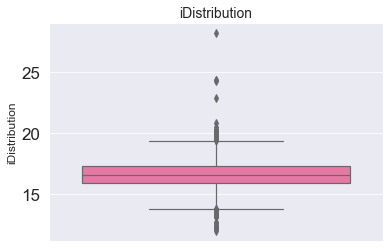

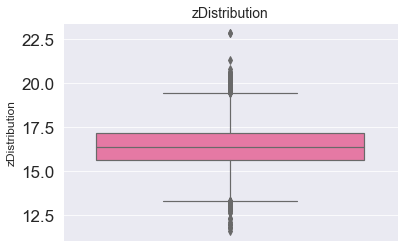

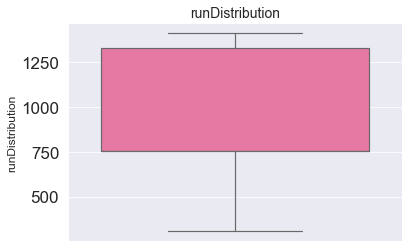

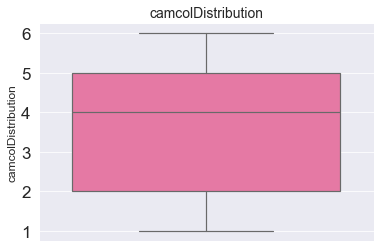

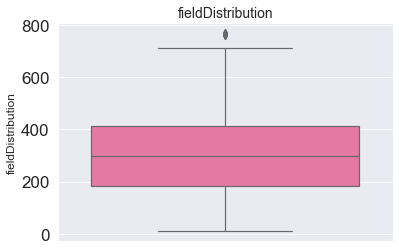

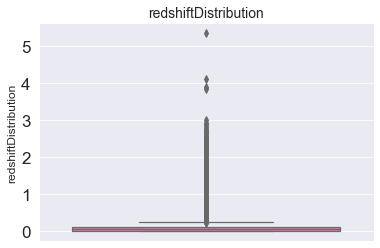

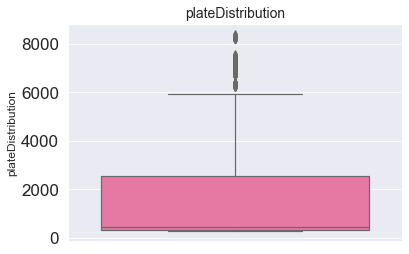

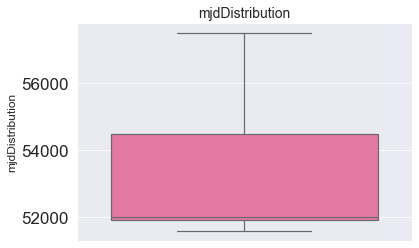

In [29]:
dx=df[['u','g','r','i','z','run','camcol','field','redshift','plate','mjd']]
for i in dx.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=i, data=df,palette='RdPu')
    plt.ylabel(i+'Distribution', fontsize=12)
    plt.title(i+"Distribution", fontsize=14)
    plt.xticks(rotation='vertical')
    plt.show()

The data entails outliers which need to be treated

#### Label Encoding the target variables

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['class'])
df['class']=le.transform(df['class'])

#### Treating the Outliers

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
data = df[(z<3).all(axis=1)]
data.shape, df.shape

((9066, 14), (10000, 14))

Around 1000 rows have been dropped, inorder to eliminate the outliers

#### Checking for correlation

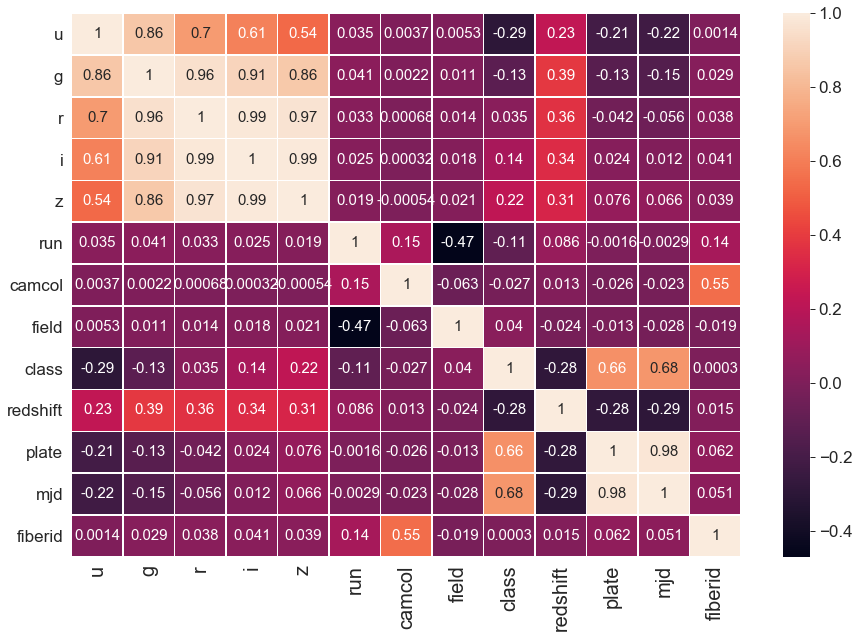

In [57]:
correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot= True, linewidths=0.5, linecolor="white")

- The column specobjib behaves very possitively with the column mjd and plate


- The columns mjd and plate cannot be dropped, since they have a good positive relation with the target variable.


- Hence it is fit to drop the column specobjid.

In [33]:
data = data.drop(['specobjid'], axis=1)

#### Checking for skewness

In [34]:
data.skew()

u          -0.970879
g          -0.515680
r          -0.146609
i           0.060173
z           0.170225
run         0.498911
camcol     -0.075388
field       0.245536
class       0.275249
redshift    4.963494
plate       1.306642
mjd         0.958779
fiberid     0.117247
dtype: float64

In [35]:
# Treating the skewness

for col in data.columns:
    if data.skew().loc[col]>4.0:
        data[col]=np.log1p(data[col])

In [36]:
data.skew()

u          -0.970879
g          -0.515680
r          -0.146609
i           0.060173
z           0.170225
run         0.498911
camcol     -0.075388
field       0.245536
class       0.275249
redshift    4.205174
plate       1.306642
mjd         0.958779
fiberid     0.117247
dtype: float64

#### Splitting the data

In [37]:
x = df.drop(columns=['class'])
y = df[['class']]

#### Standardizing the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Training Phase

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [40]:
import warnings
warnings.filterwarnings('ignore')

### Logostic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (classification_report(test_y,pred))

accuracy score: 97.4090909090909


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1096
           1       0.97      0.93      0.95       212
           2       0.96      0.99      0.98       892

    accuracy                           0.97      2200
   macro avg       0.97      0.96      0.97      2200
weighted avg       0.97      0.97      0.97      2200



### GaussianNB Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 94.13636363636364


[[1061   28    7]
 [  15  196    1]
 [  65   13  814]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1096
           1       0.83      0.92      0.87       212
           2       0.99      0.91      0.95       892

    accuracy                           0.94      2200
   macro avg       0.92      0.94      0.92      2200
weighted avg       0.94      0.94      0.94      2200



### SVM Classifier

In [43]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 98.36363636363636


[[1070    4   22]
 [   8  203    1]
 [   1    0  891]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1096
           1       0.98      0.96      0.97       212
           2       0.97      1.00      0.99       892

    accuracy                           0.98      2200
   macro avg       0.98      0.98      0.98      2200
weighted avg       0.98      0.98      0.98      2200



### DecisionTree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 98.63636363636363


[[1082   13    1]
 [  14  197    1]
 [   1    0  891]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.94      0.93      0.93       212
           2       1.00      1.00      1.00       892

    accuracy                           0.99      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.99      0.99      0.99      2200



### RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=75) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 98.54545454545455


[[1080    6   10]
 [  14  197    1]
 [   1    0  891]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.97      0.93      0.95       212
           2       0.99      1.00      0.99       892

    accuracy                           0.99      2200
   macro avg       0.98      0.97      0.98      2200
weighted avg       0.99      0.99      0.99      2200



### KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 90.45454545454545


[[1035    3   58]
 [  18  186    8]
 [ 122    1  769]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1096
           1       0.98      0.88      0.93       212
           2       0.92      0.86      0.89       892

    accuracy                           0.90      2200
   macro avg       0.93      0.89      0.91      2200
weighted avg       0.91      0.90      0.90      2200



### GradientBoostClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(random_state=0)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)
predgbr = gbr.predict(test_x)
gbr_a = accuracy_score(test_y, predgbr)*100

print('accuracy score:',gbr_a)
print('\n')
print(confusion_matrix(test_y, predgbr))
print('\n')
print(classification_report(test_y, predgbr))

accuracy score: 98.72727272727273


[[1082   13    1]
 [  12  199    1]
 [   1    0  891]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.94      0.94      0.94       212
           2       1.00      1.00      1.00       892

    accuracy                           0.99      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.99      0.99      0.99      2200



### ExtraaTreeClassifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
reg = ExtraTreesClassifier()
reg.fit(train_x, train_y)
reg.score(train_x,train_y)
predreg = reg.predict(test_x)
reg_a = accuracy_score(test_y, predreg)*100

print('accuracy score:',reg_a)
print('\n')
print(confusion_matrix(test_y, predreg))
print('\n')
print(classification_report(test_y, predreg))

accuracy score: 97.95454545454545


[[1076    5   15]
 [  14  196    2]
 [   9    0  883]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1096
           1       0.98      0.92      0.95       212
           2       0.98      0.99      0.99       892

    accuracy                           0.98      2200
   macro avg       0.98      0.97      0.97      2200
weighted avg       0.98      0.98      0.98      2200



### XGBClassifier

In [49]:
from xgboost import XGBClassifier

xbg = XGBClassifier()
xbg.fit(train_x, train_y)
xbg.score(train_x,train_y)
predxbg = xbg.predict(test_x)
xbg_a = accuracy_score(test_y, predxbg)*100

print('accuracy score:',xbg_a)
print('\n')
print(confusion_matrix(test_y, predxbg))
print('\n')
print(classification_report(test_y, predxbg))

[14:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score: 99.0


[[1087    8    1]
 [  11  200    1]
 [   1    0  891]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.96      0.94      0.95       212
           2       1.00      1.00      1.00       892

    accuracy                           0.99      2200
   macro avg       0.98      0.98      0.98      2200
weighted avg       0.99      0.99      0.99      2200



### Picking the best model

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree',
              'Random Forest','Support Vector Machines', 'KNN', 'GradientBoost', 'ExtraaTree', 'XGBoost' ],
    'Score': [log,gaussian,svcs,decision_e,random,knn_a,gbr_a,reg_a,xbg_a]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,XGBoost,99.000000
6,GradientBoost,98.727273
3,Random Forest,98.636364
4,Support Vector Machines,98.545455
2,Decision Tree,98.363636
7,ExtraaTree,97.954545
0,Logistic Regression,97.409091
1,Gaussian Naive Bayes,94.136364
5,KNN,90.454545


### CrossValidation

Picking the best 3 models and checking for their crossvalidationscore to find the best model.

1. XGBoost


2. GradientBoost


3. Random Forest

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
print('Cross Val Score for XGBoost', cross_val_score(xbg,x,y).mean())

[14:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [53]:
print('Cross Val Score for GradientBoost', cross_val_score(gbr,x,y).mean())

Cross Val Score for GradientBoost 0.9885999999999999


In [54]:
print('Cross Val Score for RandomForest', cross_val_score(rf,x,y).mean())

Cross Val Score for RandomForest 0.9884999999999999


__It XGBoost gives the best results for crossvalscore also the difference is the lowest, hence it is the best model__

### Saving the result 

In [55]:
pred_xbg = xbg.predict(test_x)
df = pd.DataFrame(pred_xbg)
df.to_csv('xgb_preddictions.csv')

### Saving the best model

In [56]:
import pickle

filename = 'solar.pkl'
pickle.dump(xbg, open(filename, 'wb'))

# Conclusions

- We also notice that most of the features stay within a reasonable scale when comparing values within only one column. 


- stars observed are somewhat closer to the earth than galaxies or quasars. Galaxies tend to be a little further away and quasars are distant from very close to very far.
explanation: Since galaxies and quasars radiate stronger due to their size and physical structure, they can be observed from further away than "small" stars.


- As we can distinct the classes from each other just based on this column - 'redshift' is very likely to be helping a lot classifying new objects.


- The plots above confirm our intuition that the further an object is from the observer, the more redshifted it will be. Redshift will be a good predictor value but unfortunately, there is a bit of overlap between the reshift of some galaxies and some QSO's.


- The fact that the distribution of dec values of galaxies und quasar objects is almost the same might indicate that one can find both galaxies and quasars at smiliar positions in the night sky.


- Many features are linearly correlated for the classes. This is to be expected since the magnitude is a measure of how bright the object is basically, so as the magnitude increases for one wavelength then it should also increase for the other wavelengths. The distribution of each magnitude is also similar for each class which means it might be harder to group them based on just the wavelengths.